In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn seaborn

In [ ]:
# Implement the Image classification CNN model for classifying hand-written
# MNIST dataset by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model's architecture
# c. Training the model
# d. Estimating the model's performance

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)


C:\Users\Yoda ji\Favorites\timewaste\timewaste\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5733 - loss: 1.3927 - val_accuracy: 0.8570 - val_loss: 0.5670
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8110 - loss: 0.6216 - val_accuracy: 0.8992 - val_loss: 0.3761
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8577 - loss: 0.4759 - val_accuracy: 0.9131 - val_loss: 0.3127
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8797 - loss: 0.4088 - val_accuracy: 0.9211 - val_loss: 0.2796
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8938 - loss: 0.3635 - val_accuracy: 0.9258 - val_loss: 0.2560
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9010 - loss: 0.3367 - val_accuracy: 0.9320 - val_loss: 0.2342
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9085 - loss: 0.3109 - val_accuracy: 0.9354 - val_loss: 0.2181
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9161 - loss: 0.2874 - val

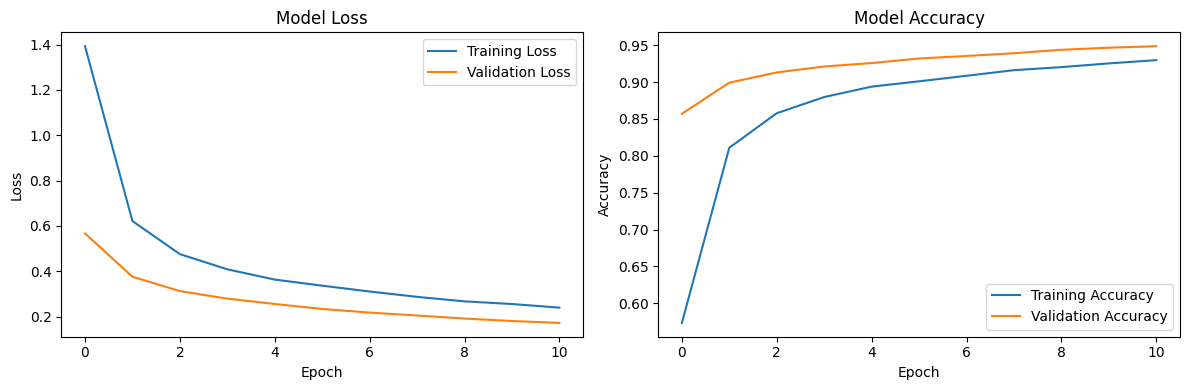

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


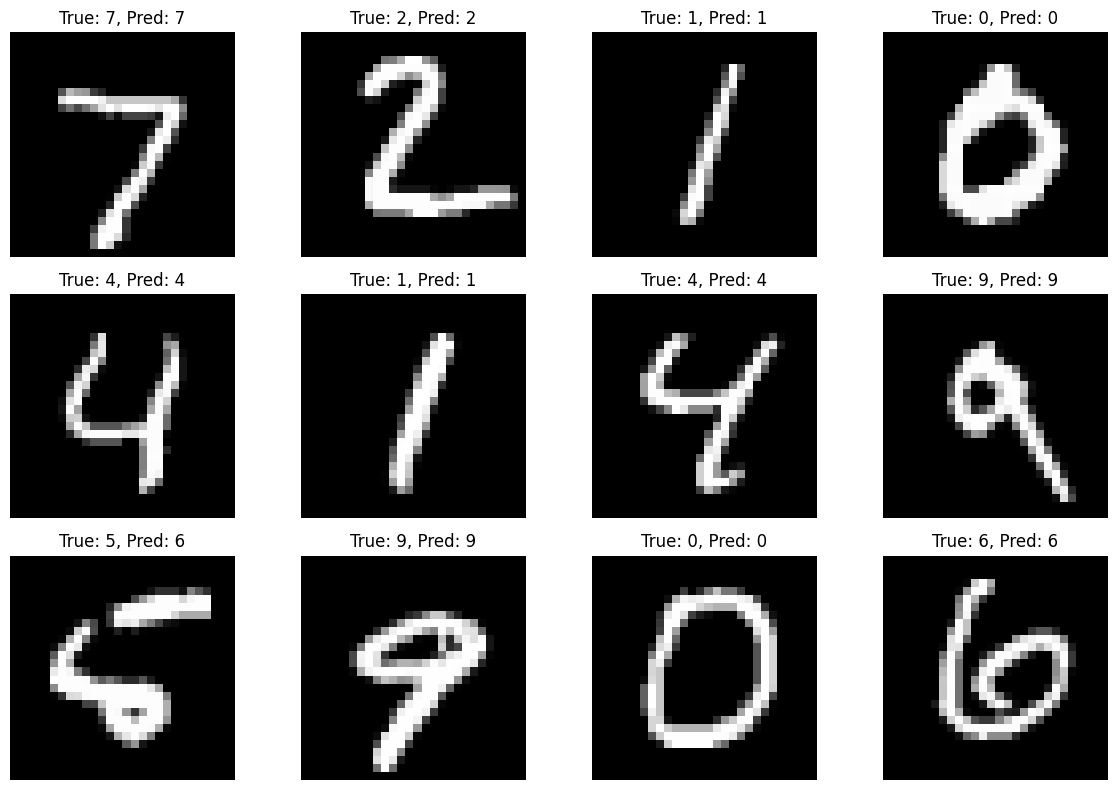

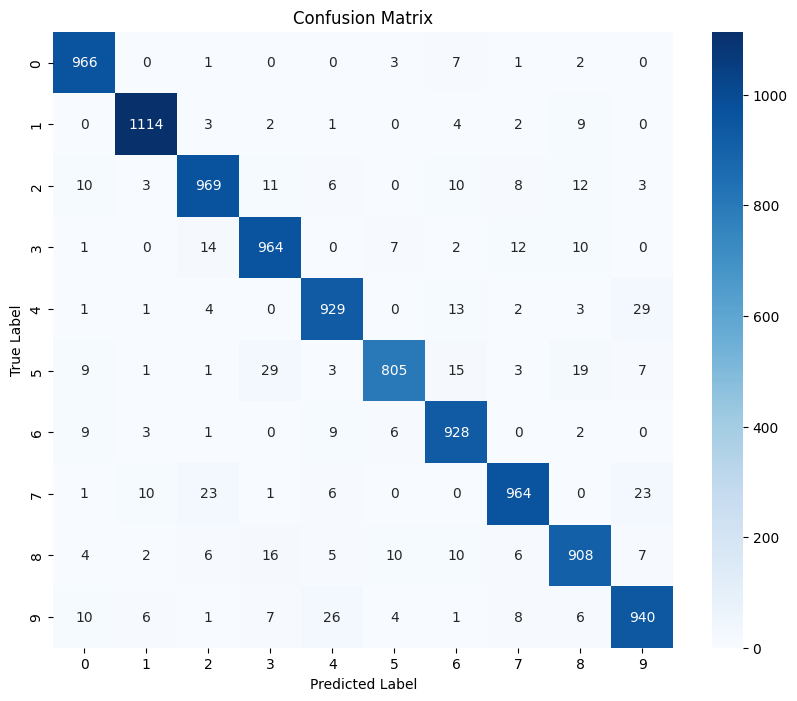


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.94      0.95      0.95      1010
           4       0.94      0.95      0.94       982
           5       0.96      0.90      0.93       892
           6       0.94      0.97      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# b. Load the training and testing data
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data from (28, 28) to (784,) for feedforward network
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# c. Define the network architecture using Keras
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# d. Train the model using SGD with 11 epochs
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=11,
    validation_data=(x_test, y_test),
    verbose=1
)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Additional: Make some predictions and display sample results
# Get predictions for test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display some sample predictions
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    # Reshape back to 28x28 for display
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

Loading training data...
Loading test data...
Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)

After normalization:
Training data range: [0.000, 1.000]
Test data range: [0.000, 1.000]

After one-hot encoding:
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)

Sample labels from training set: [5 0 4 1 9 2 1 3 1 4]
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Label distribution in training set: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

Model Architecture:


C:\Users\Yoda ji\Favorites\timewaste\timewaste\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.5864 - loss: 1.3703 - val_accuracy: 0.8553 - val_loss: 0.5644
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8095 - loss: 0.6193 - val_accuracy: 0.8971 - val_loss: 0.3731
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8572 - loss: 0.4761 - val_accuracy: 0.9093 - val_loss: 0.3117
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8803 - loss: 0.4022 - val_accuracy: 0.9211 - val_loss: 0.2743
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8937 - loss: 0.3616 - val_accuracy: 0.9272 - val_loss: 0.2490
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9009 - loss: 0.3327 - val_accuracy: 0.9334 - val_loss: 0.2291
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9101 - loss: 0.3050 - val_accuracy: 0.9382 - val_loss: 0.2130
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.91

C:\Users\Yoda ji\AppData\Local\Temp\ipykernel_26988\2406443221.py:138: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


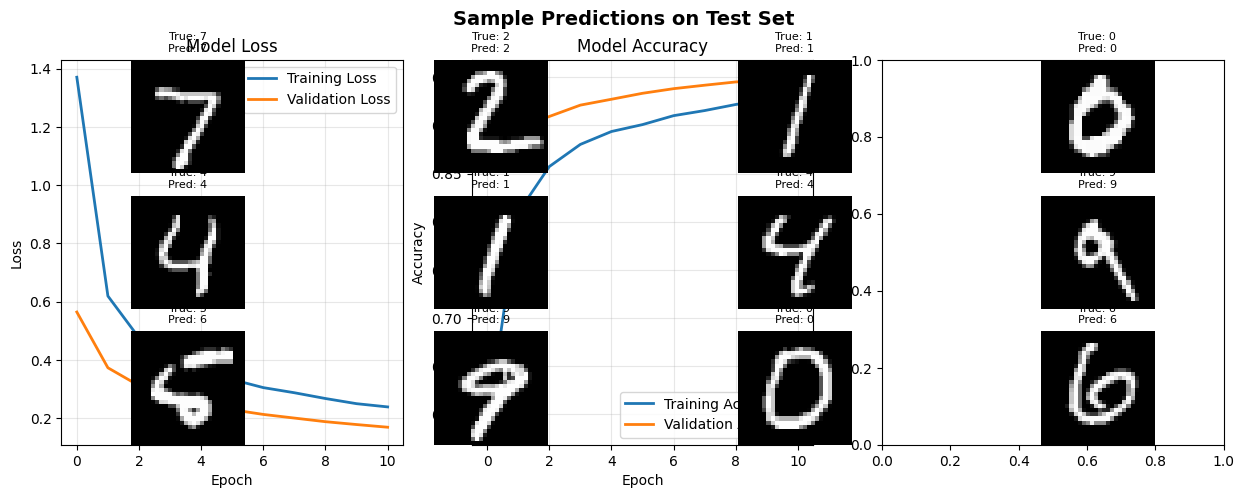

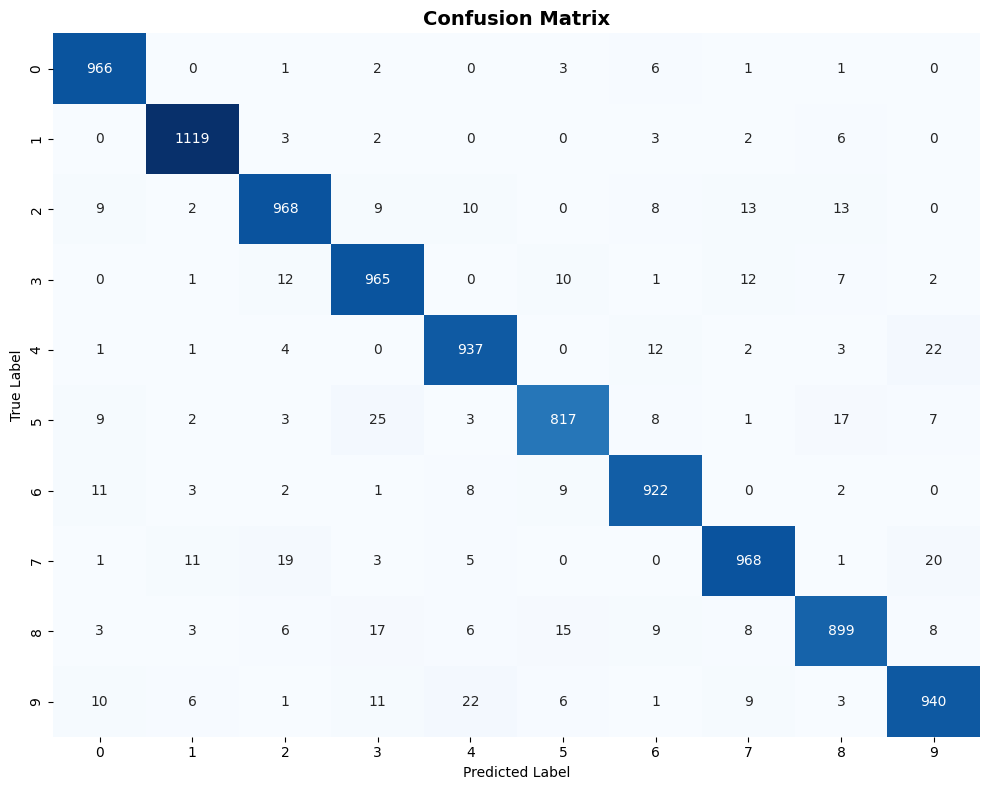


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.9564    0.9857    0.9709       980
           1     0.9747    0.9859    0.9803      1135
           2     0.9500    0.9380    0.9439      1032
           3     0.9324    0.9554    0.9438      1010
           4     0.9455    0.9542    0.9498       982
           5     0.9500    0.9159    0.9326       892
           6     0.9505    0.9624    0.9564       958
           7     0.9528    0.9416    0.9472      1028
           8     0.9443    0.9230    0.9335       974
           9     0.9409    0.9316    0.9363      1009

    accuracy                         0.9501     10000
   macro avg     0.9498    0.9494    0.9495     10000
weighted avg     0.9501    0.9501    0.9500     10000


Number of misclassified samples: 499
Error rate: 4.99%


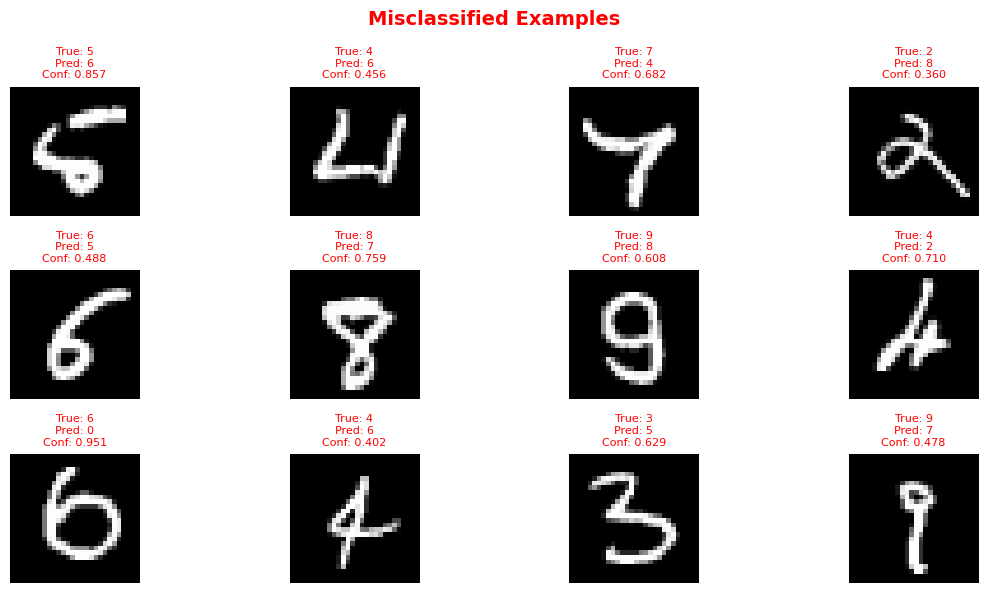


Model saved as 'mnist_feedforward_model.h5'

TRAINING SUMMARY
Final Test Accuracy: 0.9501
Final Test Loss: 0.1690
Training Samples: 60,000
Test Samples: 10,000
Model Parameters: 567,434


In [2]:
# a. Import the necessary packages loading dataset without keras will work locally with csv files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# b. Load the training and testing data from CSV files
def load_mnist_from_csv(train_file, test_file):
    """
    Load MNIST data from CSV files
    First column is label, remaining 784 columns are pixel values
    """
    print("Loading training data...")
    train_data = pd.read_csv(train_file)
    print("Loading test data...")
    test_data = pd.read_csv(test_file)
    
    # Extract labels (first column) and images (remaining columns)
    y_train = train_data.iloc[:, 0].values
    x_train = train_data.iloc[:, 1:].values
    
    y_test = test_data.iloc[:, 0].values
    x_test = test_data.iloc[:, 1:].values
    
    print(f"Training data shape: {x_train.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test data shape: {x_test.shape}")
    print(f"Test labels shape: {y_test.shape}")
    
    return (x_train, y_train), (x_test, y_test)

# Load data from CSV files
(x_train, y_train), (x_test, y_test) = load_mnist_from_csv('mnist_train.csv', 'mnist_test.csv')

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Note: Data is already in (784,) shape from CSV, no need to reshape
print(f"\nAfter normalization:")
print(f"Training data range: [{x_train.min():.3f}, {x_train.max():.3f}]")
print(f"Test data range: [{x_test.min():.3f}, {x_test.max():.3f}]")

# Convert labels to categorical one-hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"\nAfter one-hot encoding:")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Test labels shape: {y_test_categorical.shape}")

# Display sample data information
print(f"\nSample labels from training set: {y_train[:10]}")
print(f"Unique labels in training set: {np.unique(y_train)}")
print(f"Label distribution in training set: {np.bincount(y_train)}")

# c. Define the network architecture using Keras
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Print model summary
print("\nModel Architecture:")
model.summary()

# Compile the model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# d. Train the model using SGD with 11 epochs
print("\nStarting training...")
history = model.fit(
    x_train, y_train_categorical,
    batch_size=128,
    epochs=11,
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(15, 5))

# Plot training & validation loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot training & validation accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Additional: Make some predictions and display sample results
# Get predictions for test set
predictions = model.predict(x_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test  # Use original labels, not one-hot

# Display some sample predictions
plt.subplot(1, 3, 3)
# Show first 12 test images with predictions
for i in range(12):
    plt.subplot(3, 4, i + 1)
    # Reshape to 28x28 for display
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_classes[i]}\nPred: {predicted_classes[i]}', fontsize=8)
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(true_classes, predicted_classes, digits=4))

# Additional: Display some misclassified examples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

if len(misclassified_indices) > 0:
    print(f"\nNumber of misclassified samples: {len(misclassified_indices)}")
    print(f"Error rate: {len(misclassified_indices)/len(true_classes)*100:.2f}%")
    
    # Show some misclassified examples
    plt.figure(figsize=(12, 6))
    num_misclassified_to_show = min(12, len(misclassified_indices))
    
    for i, idx in enumerate(misclassified_indices[:num_misclassified_to_show]):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        confidence = np.max(predictions[idx])
        plt.title(f'True: {true_classes[idx]}\nPred: {predicted_classes[idx]}\nConf: {confidence:.3f}', 
                 fontsize=8, color='red')
        plt.axis('off')
    
    plt.suptitle('Misclassified Examples', fontsize=14, fontweight='bold', color='red')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo misclassified samples! Perfect accuracy!")

# Save the model
model.save('mnist_feedforward_model.h5')
print(f"\nModel saved as 'mnist_feedforward_model.h5'")

# Final summary
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Training Samples: {len(x_train):,}")
print(f"Test Samples: {len(x_test):,}")
print(f"Model Parameters: {model.count_params():,}")
print("="*60)